# **ASSIGNMENT 4**
@Authors: **Harshit Shiroiya** (hshiroiy) and **Saurabh Gulati** (sagulati)

Import Statements

In [2]:
import numpy as np
import math
import os
import sys
from collections import deque
import time
import matplotlib.pyplot as plt

# **Problem 1:**

**Suppose you are given two sequences D1 and D2 of n elements, possibly containing duplicates, on which a total order relation is defined. Describe an efficient algorithm for determining if D1 and D2 contain the same set of elements. What is the running time of this method?**



### **Solution :**

*   First, we initialise two empty sets
*   Then, we append both the input array lists to the sets
*   Firstly, we compare the length of both sets. Since "sets" are unique and no duplicate values are allowed in a set, we can compare if each set contain same number of elements
*   Once we determine that both sets are of equal length, we compare values of each set by iterating through the set length once (time complexity ~ O(l) where l is length of the set)
*   The running time for this Algorithm is O(n) which is the worst case where there are no duplicate elements in the input array lists

#### **Algorithm (Pseudo Code):**

```
CHECK-SETS(d1,d2)
  #Initializing empty sets
  set1 = set()
  set2 = set()

  #Append elements of each list to set
  for i -> length(d1)
      append d1 to set1
  for i -> length(d2)
      append d2 to set2
  
  #Compare length of both the sets
  If len(set1) == len(set2)
      #If length of both sets are equal, compare elements of both set - iterating once through set length
      if set1 == set2
          return True
      else 
          return False
```


#### **Algorithm (Code Implementation):**

In [3]:
def check_set(d1,d2):
  set1 = set()
  set2 = set()
  for i in range(len(d1)):
      set1.add(d1[i])
  # print(set1)
  
  for i in range(len(d2)):
      set2.add(d2[i])
  # print(set2)

  if (len(set1) == len(set2)):
      if(set1 == set2):
          print("The given sets contain the same set of elements.")   
      else:
          print('The given sets do not contain the same set of elements.')
  else:
      print('The given sets do not contain the same set of elements.')


d1=[1,2,3,4,4,5,6,7,8]
d2=[1,1,2,3,4,5,6,7,7,8]
check_set(d1,d2)

The given sets contain the same set of elements.


# **Problem 2:**

**Given an array D of n integers in the range [0, $n^{2}$ − 1], describe a simple method for sorting D in O(n) time.**

### **Solution :**

We know that only a subset of the sorting algorithms sort in O(n). Radix Sort is the best algorithm to use in this case. It will use counting sort internally, but only for single digits. As a result, in the case of Radix sort, the array size of counting sort remains constant. That is why we have chosen Radix sort.
To put this algorithm into action, we can use a counting sort for each digit in the range of least significant digit to most significant digit. 

For the algorithm the running time is O(d(n+k)) where d is the number of digits, n is the size of the input array and k is the range of values for each digit. Here, each digit takes value from 0 to 9, therefore k is 10.



### **Algorithm (Pseudo Code):**



```
COUNTING-SORT(arr,x)
    n -> length (arr)
    let C[0...10] be new count array of size 10
    let B[0...A.length] be new array
    for i -> n
        index -> arr[i] // x
        c[index % 10] ++
    for i -> (1,....,10)
        c[i] -> c[i] + c[i-1]  
    
    While i > 0
        index -> arr[i] // x
        b[c[index % 10] - 1] -> arr[i]
        c[index % 10] -> c[index % 10] - 1
        i -> i - 1

    for i in range(0, len(arr)):
        arr[i] -> b[i]

RADIX-SORT(arr)
    max(arr)
    while max / x > 0:
        COUNTING-SORT(arr,x)
        x *= 10
    OUTPUT : arr

```


### **Algorithm (Code Implementation):**

In [4]:
def counting_sort(arr,x):
    n = len(arr)
    c = [0]*10  
    b = [0]*n
    for i in range(n):
        index = arr[i]//x
        c[index%10]+=1
    for i in range(1,10):
        c[i]+=c[i-1]
    
    i = n-1
    while(i>=0):
        index = arr[i] // x
        b[c[index % 10] - 1] = arr[i]
        c[index % 10] -= 1
        i -= 1
    
    i = 0
    for i in range(0, len(arr)):
        arr[i] = b[i]
        
        
def radix_sort(arr):
    
    maximum = max(arr)
    x = 1
    while maximum / x > 0:
        counting_sort(arr, x)
        x *= 10
    print(arr)
        
arr = [333, 227, 112, 441, 656, 218, 339]
radix_sort(arr)

[112, 218, 227, 333, 339, 441, 656]


# **Problem 3:**
**Given a sequence D of n elements, on which a total order relation is defined, describe an efficient method for determining whether there are two equal elements in D. What is the running time of your method?**




### **Solution :**



*   First We create a new set and append the list value in set.
*   Later we compare the value of an element with next element till the last element in the set and get the desired output.
*   The Time-complexity for this algorithm is O(n), since accessing the elements of set takes O(n).


### **Algorithm (Pseudo Code):**

```
CHECK-VALUE(d)
    set()
    n -> Length of d
    for i -> n
        if d[i] in set()
            return True
        else 
            append d[i] -> set()
    OUTPUT False


```


### **Algorithm (Code Implementation):**

In [5]:
def check_values(d):
  b = True
  s = set()
  n = len(d)
  for i in range(n):
      if(d[i] in s):
          b=False
          print("The set contains duplicate value")
          break
      else:
          s.add(d[i])
  if(b == True):
      print("The set does not contains duplicate value")


arr = [1,4,3,2,5]
check_values(arr)

The set does not contains duplicate value


# **Problem 4:**
**Implement a bottom-up merge-sort for a collection of items by placing each item in its own queue, and then repeatedly merging pairs of queues until all items are sorted within a single queue.**


In [6]:
def merge(inputQueue,start,inc):
    nSize = len(inputQueue)

    outputQueue = deque()
    leftQueue = deque()
    rightQueue = deque()

    #print("nSize: "+str(nSize))
    #print("start: "+str(start))
    #print("inc: "+str(inc))

    for i in range(inc):
        if len(inputQueue)>0:
            leftQueue.appendleft(inputQueue.pop())
        else:
            break

    for i in range(min(inc,nSize-inc)):
        if len(inputQueue)>0:
            rightQueue.appendleft(inputQueue.pop())
        else:
            break

    while len(leftQueue)>0 and len(rightQueue)>0:
        #print("Both Queue Iteration")
        l = leftQueue.pop()
        r = rightQueue.pop()

        #print("l: "+str(l))
        #print("r: "+str(r))

        if l<r:
        outputQueue.appendleft(l)
        rightQueue.append(r)
        else:
        outputQueue.appendleft(r)
        leftQueue.append(l)

    while len(leftQueue)>0 and len(rightQueue) == 0:
        #print("Left Queue Iteration")
        l = leftQueue.pop()
        #print("l: "+str(l))
        outputQueue.appendleft(l)


    while len(leftQueue)== 0 and len(rightQueue)>0:
        #print("Right Queue Iteration")
        r = rightQueue.pop()
        #print("r: "+str(r))
        outputQueue.appendleft(r)

    return outputQueue


IndentationError: expected an indented block (<ipython-input-6-08b419ff9973>, line 33)

In [3]:
def merge_sort(inputArray):
    inputQueue = deque()
    for i in inputArray:
        inputQueue.appendleft(i)
    nSize = len(inputQueue)
    logn = math.ceil(math.log(nSize,2))
    inputQueue_i = deque() 
    inputQueue_input = inputQueue.copy()
    for i in (2**k for k in range(logn)):
        #print("i: "+str(i))
        for j in range(0,nSize,2*i):
              #inputQueue_input = inputQueue.copy()
              #print("j: "+str(j))
              outputQueue = merge(inputQueue_input,j,i)
              #print("output queue size: "+str(len(outputQueue)))
      #print("Printing output Queue")
    for k in range(len(outputQueue)):
        a = outputQueue.pop()
        #print(a)
        inputQueue_i.appendleft(a)
      #print("\n")

    inputQueue_input = inputQueue_i.copy()
    inputQueue_i.clear()
    #print("\n")
  
    output = []
    for i in range(len(inputQueue_input)):
        output.append(inputQueue_input.pop())
  
    print("Merge Sort: ", output)


arr = [12, 41, 23, 15, 76, 27, 10]
merge_sort(arr)

NameError: name 'deque' is not defined

# **Problem  5:**

**Implement the heap-sort algorithm given in algorithm 1. The max_heapify and build_max_heap procedures are described in algorithm 2 and algorithm 3, respectively.**



In [ ]:
def max_heapify(d,input_length,i):
    largest = i
    l = 2*i + 1
    r = 2*i + 2

    if l < input_length and d[l] > d[i]:
        largest = l
    else:
        largest = i
    
    if r < input_length and d[r] > d[largest]:
        largest = r
    
    if largest != i:
        d[i], d[largest] = d[largest], d[i]
        max_heapify(d,input_length,largest)
        
    
def build_max_heap(d):
    input_length = len(d)
    for i in range (input_length//2,-1,-1):
        max_heapify(d,input_length,i)
        
def heap_sort(d):
    build_max_heap(d)
    input_length = len(d)
    for i in range(input_length-1, 0, -1):
        d[i], d[0] = d[0], d[i]   
        max_heapify(d, i, 0)
    print('Heap Sort: ', d)
    
  
d = [2, 12, 11, 13, 5, 6, 7, 10, 1, 99, 4]
heap_sort(d)

Heap Sort:  [1, 2, 4, 5, 6, 7, 10, 11, 12, 13, 99]


# **Problem 6:**
**Implement the counting-sort algorithm given in algorithm 4.**

In [ ]:
def counting_sort(input, output, k):
  
  #initializing output array of same size as input array
  output = np.zeros((len(input)), dtype=int)

  #Initializing an array of size k with all zero elements
  countArr = np.zeros((k+1,), dtype=int)

  #Iterating through input arr
  for i in input:
    countArr[i] += 1
  
  #Taking cummulative sum
  for i in range (1,k+1):
    countArr[i] = countArr[i] + countArr[i-1]
  
  #Rearraning the elements based on count of each element
  i = len(input) - 1
  while i>=0:
    a = input[i]
    index = countArr[a]
    output[index - 1] = a
    countArr[a] = countArr[a]-1
    i = i - 1
  print("Counting Sort: ", output)

arr = [12, 41, 23, 15, 76, 27, 10]
output = []
k = np.max(arr)
counting_sort(arr,output,k)



Counting Sort:  [10 12 15 23 27 41 76]


# **Problem 7:**
**Implement the bucket sort algorithm given in algorithm 5.**

In [ ]:
def insertion_sort(b):
    for i in range(1,len(b)):
        element = b[i]
        j = i-1
        while j >= 0 and b[j] > element:
            b[j+1] = b[j]
            j-=1
        b[j+1] = element
    return b

In [ ]:
# For Decimal input
def bucket_sort_decimal(d):
    input_length = len(d)
    b = []
    
    for i in range(input_length):
        b.append([])

    for j in d:
        index_b = int(input_length * j)
        b[index_b].append(j)

    for i in range(input_length):
        b[i] = insertion_sort(b[i])

    k = 0
    for i in range(input_length):
        for j in range(len(b[i])):
            d[k] = b[i][j]
            k += 1
    print("Bucket Sort (decimals): ",arr)


arr = [.42, .32, .33, .52, .37, .47, .51]
bucket_sort_decimal(arr)

Bucket Sort (decimals):  [0.32, 0.33, 0.37, 0.42, 0.47, 0.51, 0.52]


In [ ]:
# For integer inputs

def bucket_sort_integer(d):
    input_length = len(d)
    p =- 1
    maximum = int(max(d))
    l=[10,100,1000,10000,100000]
    
    
    for i in range(len(l)):
        if(maximum % l[i] == maximum):
            p = l[i]
            break
    if(p != -1):
        for i in range(input_length):
            d[i] = d[i] / p
    
    b = []
    for i in range(input_length):
        b.append([])
    
    for j in d:
        index_b = int(input_length * j)
        b[index_b].append(j)
    
    for i in range(len(b)):
        b[i] = insertion_sort(b[i])
        
    k=0
    for i in range(input_length):
        for j in range(len(b[i])):
            d[k] = b[i][j]
            k+=1
    
    for i in range(input_length):
        d[i] = int(d[i] * p)
    print('Bucket Sort: ',d)
    
arr = [ 12, 41, 23, 15, 76, 27, 10]
bucket_sort_integer(arr)

Bucket Sort:  [10, 12, 15, 23, 27, 41, 76]


# **Analysis of Time Complexity for sorting algorithms in Problem 4 to 7**

Problem 4 - Merge Sort <br>
Problem 5 - Heap Sort <br>
Problem 6 - Counting Sort <br>
Problem 7 - Bucket Sort <br>

In [ ]:
# Helper function to run and get running time for the 4 algorithms

def runningAnalysis(arr, outputArray_merge, outputArray_heap, outputArray_count, outputArray_bucket):
  start = time.time()
  merge_sort(arr)
  end = time.time()
  outputArray_merge.append(end-start)

  start = time.time()
  heap_sort(arr)
  end = time.time()
  outputArray_heap.append(end-start)
  
  output = []
  k = np.max(arr)
  start = time.time()
  counting_sort(arr,output,k)
  end = time.time()
  outputArray_count.append(end-start)
  
  start = time.time()
  bucket_sort_integer(arr)
  end = time.time()
  outputArray_bucket.append(end-start)
  

In [ ]:
# Randomly initilaized arrays for time comparision
maxSize = 10**5
outputUnsortedArray_merge = []
outputUnsortedArray_heap = []
outputUnsortedArray_count = []
outputUnsortedArray_bucket = []

outputSortedArray_merge = []
outputSortedArray_heap = []
outputSortedArray_count = []
outputSortedArray_bucket = []

xAxis = []

for i in range (1,maxSize,10000):
  xAxis.append(i)
  randomArrayUnsorted = np.random.randint(1,maxSize,size = i)
  randomArraySorted = np.sort(randomArrayUnsorted)
  runningAnalysis(randomArrayUnsorted,outputUnsortedArray_merge,outputUnsortedArray_heap,outputUnsortedArray_count,outputUnsortedArray_bucket)
  runningAnalysis(randomArraySorted,outputSortedArray_merge,outputSortedArray_heap,outputSortedArray_count,outputSortedArray_bucket)


# Comparing the 4 algorithms for Unsorted Array

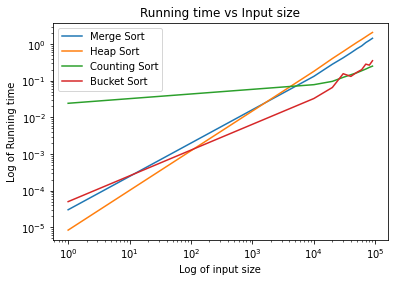

In [ ]:
plt.plot(xAxis,outputUnsortedArray_merge)
plt.plot(xAxis,outputUnsortedArray_heap)
plt.plot(xAxis,outputUnsortedArray_count)
plt.plot(xAxis,outputUnsortedArray_bucket)
plt.title('Running time vs Input size')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Log of Running time')
plt.xlabel('Log of input size')
plt.legend(["Merge Sort", "Heap Sort","Counting Sort","Bucket Sort"])
plt.show()

The Graph shows us that Bucket Sort takes the maximum time out of the 4 Algorithms and this is the analysis of unsorted algorithm hence it is not uniform towards the end.

# Comparing the 4 algorithms for Sorted Array

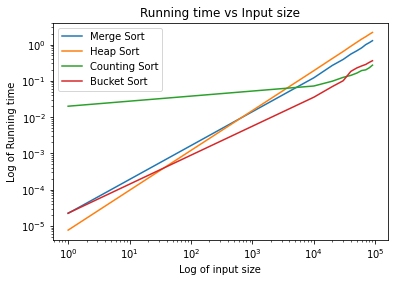

In [ ]:
plt.plot(xAxis,outputSortedArray_merge)
plt.plot(xAxis,outputSortedArray_heap)
plt.plot(xAxis,outputSortedArray_count)
plt.plot(xAxis,outputSortedArray_bucket)
plt.title('Running time vs Input size')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Log of Running time')
plt.xlabel('Log of input size')
plt.legend(["Merge Sort", "Heap Sort","Counting Sort","Bucket Sort"])
plt.show()

The Graph shows us that Bucket Sort again takes the maximum time and since this is the analysis for sorted arrays therefore throughout the graph is uniform.